In [1]:
from bitarray import bitarray
import mmh3
import random
import numpy as np
import math

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K

/Users/aditijain/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/aditijain/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/aditijain/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/aditijain/opt/anaconda3/lib/python3.7/site-packages

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
additional_metrics = ['acc']
loss_function = BinaryCrossentropy()
number_of_epochs = 2000
optimizer = Adam()
verbosity_mode = 0
layer_size = 10

In [5]:
model = Sequential()
model.add(Dense(layer_size,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [6]:
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                20        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [8]:
m=75000
n=25000
r=0.5

In [9]:
x_pos = np.random.normal(loc=250, scale=100, size=(int(n*r)))
x_neg = np.random.normal(loc=750, scale=100, size=(n-int(n*r)))

x_train = np.concatenate((x_pos, x_neg)).reshape(-1, 1).astype(int)
y_train = np.concatenate((np.ones(int(n*r)), np.zeros(n-int(n*r)))).reshape(-1, 1).astype(int)

In [10]:
x_train.shape

(25000, 1)

In [43]:
y_train[12499]

array([1])

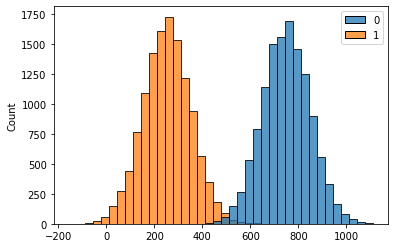

In [11]:
sns.histplot(x=x_train.flatten(), hue=y_train.flatten())

## Model training

In [12]:
batch_size = len(x_train)

In [13]:
history = model.fit(x_train, y_train, batch_size = batch_size, epochs=number_of_epochs, verbose=verbosity_mode)

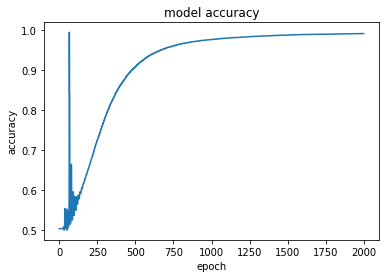

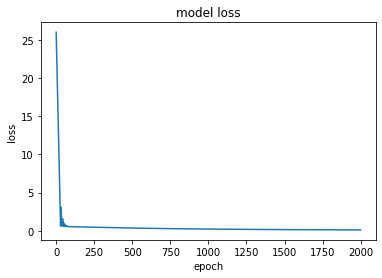

In [14]:
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#Hidden Layer Size=10

In [52]:
number_of_epochs = 1500
layer_size = 5

In [53]:
model = Sequential()
model.add(Dense(layer_size,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [54]:
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)

In [55]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 5)                 10        
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 6         
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


In [56]:
history = model.fit(x_train, y_train, batch_size = batch_size, epochs=number_of_epochs, verbose=verbosity_mode)

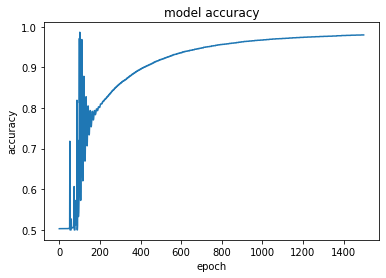

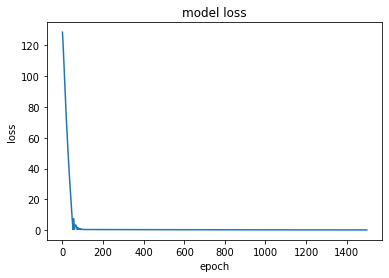

In [57]:
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#Hidden Layer Size=50

In [61]:
layer_size = 20
number_of_epochs = 800
model = Sequential()
model.add(Dense(layer_size,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)
model.summary()
history = model.fit(x_train, y_train, batch_size = batch_size, epochs=number_of_epochs, verbose=verbosity_mode)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 20)                40        
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 21        
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


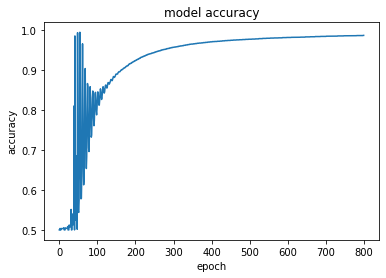

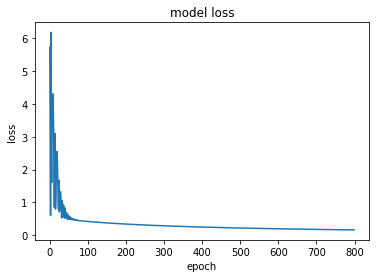

In [62]:
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#Hidden Layer Size=200

In [34]:
number_of_epochs = 300
layer_size = 1000
model = Sequential()
model.add(Dense(layer_size,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)
model.summary()
history = model.fit(x_train, y_train, batch_size = batch_size, epochs=number_of_epochs, verbose=verbosity_mode)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 1000)              2000      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 1001      
Total params: 3,001
Trainable params: 3,001
Non-trainable params: 0
_________________________________________________________________


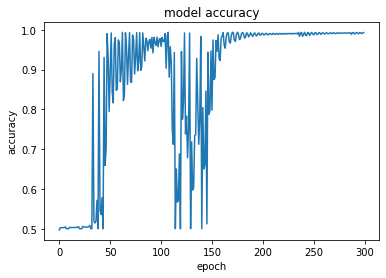

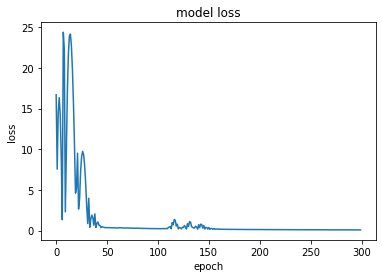

In [35]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#Hidden Layer Size=1000

In [28]:
class BloomFilter:
    
    def __init__(self, size, model): #hash count is 1
        self.size = size
      #  self.hash_count = hash_count
        self.bit_array = bitarray(size)
        self.bit_array.setall(0)
        self.model=model #classifier model associated as hash function
        
    def add(self, num):
        #for seed in range(1,self.hash_count+1):
            #result = mmh3.hash(str(num), seed) % self.size
        result=math.floor(model.predict(num)[0]*(self.size-1))    
        self.bit_array[result] = 1
            
    def lookup(self, num):
        #for seed in range(1,self.hash_count+1):
            #result = mmh3.hash(str(num), seed) % self.size
        result=math.floor(model.predict(num)[0]*(self.size-1))    
        if self.bit_array[result] == 0:
                return False
        return True

#adds ratio r of an array of random integers of size n to bloom filter bf(input : bf,size,ratio; output: data array)
def addrandom(bf,n,r):
    data=np.empty(n,dtype=int)
    for i in range(0,n):
        data[i]=random.randint(0, 100000000)
    for j in range(0,int(n*r)):
        bf.add(data[j]);
    return data

#(Input:bloom filter,number array,ratio of positives; Output:(-1) for false negative, otherwise fpr)
def fpr(bf,nums,r):
    for i in range(int(len(nums)*r)):
        if(bf.lookup(nums[i])==False):
            print(nums[i])
            return -1
    count = 0
    for i in range(int(len(nums)*r),len(nums)):
        if(bf.lookup(nums[i])==True):
            count+=1
    return count/(len(nums)-int(len(nums)*r))

#(Input:bloom filter size, total random numbers, ratio of number inserted; Output:efficient number of hash functions)
def eff_k(m,n,r):
    k=int(m/(int(n*r))*math.log(2))
    if(k==0):
        return 1
    return k

#(Input:size of bloom filter, number of hash functions, total numbers, ratio of numbers inserted; Output: fpr)
def find_fpr(m,model,n,r):
    bf=BloomFilter(model,m)
    data=addrandom(bf,n,r)
    return fpr(bf,data,r)

#(Input:size of bloom filter, total numbers, ratio of numbers inserted; Output: prints inputs and fpr)
def outputs(m,n,r):
    find_fpr(m,model,n,r)
    #print("For m=%d, k=%d, n=%d, r=%.3f: fpr=%.3f"%(m,k,n,r,find_fpr(m,k,n,r)))

In [46]:
bf=BloomFilter(m,model)

In [50]:
def load_bloom(data_x,bf,r):
    for i in range(0,int(len(data_x)*r)):
        #print({i})
        bf.add(data_x[i])
    return

In [51]:
load_bloom(x_train,bf,r)

{0}
{1}
{2}
{3}
{4}
{5}
{6}
{7}
{8}
{9}
{10}
{11}
{12}
{13}
{14}
{15}
{16}
{17}
{18}
{19}
{20}
{21}
{22}
{23}
{24}
{25}
{26}
{27}
{28}
{29}
{30}
{31}
{32}
{33}
{34}
{35}
{36}
{37}
{38}
{39}
{40}
{41}
{42}
{43}
{44}
{45}
{46}
{47}
{48}
{49}
{50}
{51}
{52}
{53}
{54}
{55}
{56}
{57}
{58}
{59}
{60}
{61}
{62}
{63}
{64}
{65}
{66}
{67}
{68}
{69}
{70}
{71}
{72}
{73}
{74}
{75}
{76}
{77}
{78}
{79}
{80}
{81}
{82}
{83}
{84}
{85}
{86}
{87}
{88}
{89}
{90}
{91}
{92}
{93}
{94}
{95}
{96}
{97}
{98}
{99}
{100}
{101}
{102}
{103}
{104}
{105}
{106}
{107}
{108}
{109}
{110}
{111}
{112}
{113}
{114}
{115}
{116}
{117}
{118}
{119}
{120}
{121}
{122}
{123}
{124}
{125}
{126}
{127}
{128}
{129}
{130}
{131}
{132}
{133}
{134}
{135}
{136}
{137}
{138}
{139}
{140}
{141}
{142}
{143}
{144}
{145}
{146}
{147}
{148}
{149}
{150}
{151}
{152}
{153}
{154}
{155}
{156}
{157}
{158}
{159}
{160}
{161}
{162}
{163}
{164}
{165}
{166}
{167}
{168}
{169}
{170}
{171}
{172}
{173}
{174}
{175}
{176}
{177}
{178}
{179}
{180}
{181}
{182}
{183}
{184}


{1383}
{1384}
{1385}
{1386}
{1387}
{1388}
{1389}
{1390}
{1391}
{1392}
{1393}
{1394}
{1395}
{1396}
{1397}
{1398}
{1399}
{1400}
{1401}
{1402}
{1403}
{1404}
{1405}
{1406}
{1407}
{1408}
{1409}
{1410}
{1411}
{1412}
{1413}
{1414}
{1415}
{1416}
{1417}
{1418}
{1419}
{1420}
{1421}
{1422}
{1423}
{1424}
{1425}
{1426}
{1427}
{1428}
{1429}
{1430}
{1431}
{1432}
{1433}
{1434}
{1435}
{1436}
{1437}
{1438}
{1439}
{1440}
{1441}
{1442}
{1443}
{1444}
{1445}
{1446}
{1447}
{1448}
{1449}
{1450}
{1451}
{1452}
{1453}
{1454}
{1455}
{1456}
{1457}
{1458}
{1459}
{1460}
{1461}
{1462}
{1463}
{1464}
{1465}
{1466}
{1467}
{1468}
{1469}
{1470}
{1471}
{1472}
{1473}
{1474}
{1475}
{1476}
{1477}
{1478}
{1479}
{1480}
{1481}
{1482}
{1483}
{1484}
{1485}
{1486}
{1487}
{1488}
{1489}
{1490}
{1491}
{1492}
{1493}
{1494}
{1495}
{1496}
{1497}
{1498}
{1499}
{1500}
{1501}
{1502}
{1503}
{1504}
{1505}
{1506}
{1507}
{1508}
{1509}
{1510}
{1511}
{1512}
{1513}
{1514}
{1515}
{1516}
{1517}
{1518}
{1519}
{1520}
{1521}
{1522}
{1523}
{1524}
{1525}

{2637}
{2638}
{2639}
{2640}
{2641}
{2642}
{2643}
{2644}
{2645}
{2646}
{2647}
{2648}
{2649}
{2650}
{2651}
{2652}
{2653}
{2654}
{2655}
{2656}
{2657}
{2658}
{2659}
{2660}
{2661}
{2662}
{2663}
{2664}
{2665}
{2666}
{2667}
{2668}
{2669}
{2670}
{2671}
{2672}
{2673}
{2674}
{2675}
{2676}
{2677}
{2678}
{2679}
{2680}
{2681}
{2682}
{2683}
{2684}
{2685}
{2686}
{2687}
{2688}
{2689}
{2690}
{2691}
{2692}
{2693}
{2694}
{2695}
{2696}
{2697}
{2698}
{2699}
{2700}
{2701}
{2702}
{2703}
{2704}
{2705}
{2706}
{2707}
{2708}
{2709}
{2710}
{2711}
{2712}
{2713}
{2714}
{2715}
{2716}
{2717}
{2718}
{2719}
{2720}
{2721}
{2722}
{2723}
{2724}
{2725}
{2726}
{2727}
{2728}
{2729}
{2730}
{2731}
{2732}
{2733}
{2734}
{2735}
{2736}
{2737}
{2738}
{2739}
{2740}
{2741}
{2742}
{2743}
{2744}
{2745}
{2746}
{2747}
{2748}
{2749}
{2750}
{2751}
{2752}
{2753}
{2754}
{2755}
{2756}
{2757}
{2758}
{2759}
{2760}
{2761}
{2762}
{2763}
{2764}
{2765}
{2766}
{2767}
{2768}
{2769}
{2770}
{2771}
{2772}
{2773}
{2774}
{2775}
{2776}
{2777}
{2778}
{2779}

{3874}
{3875}
{3876}
{3877}
{3878}
{3879}
{3880}
{3881}
{3882}
{3883}
{3884}
{3885}
{3886}
{3887}
{3888}
{3889}
{3890}
{3891}
{3892}
{3893}
{3894}
{3895}
{3896}
{3897}
{3898}
{3899}
{3900}
{3901}
{3902}
{3903}
{3904}
{3905}
{3906}
{3907}
{3908}
{3909}
{3910}
{3911}
{3912}
{3913}
{3914}
{3915}
{3916}
{3917}
{3918}
{3919}
{3920}
{3921}
{3922}
{3923}
{3924}
{3925}
{3926}
{3927}
{3928}
{3929}
{3930}
{3931}
{3932}
{3933}
{3934}
{3935}
{3936}
{3937}
{3938}
{3939}
{3940}
{3941}
{3942}
{3943}
{3944}
{3945}
{3946}
{3947}
{3948}
{3949}
{3950}
{3951}
{3952}
{3953}
{3954}
{3955}
{3956}
{3957}
{3958}
{3959}
{3960}
{3961}
{3962}
{3963}
{3964}
{3965}
{3966}
{3967}
{3968}
{3969}
{3970}
{3971}
{3972}
{3973}
{3974}
{3975}
{3976}
{3977}
{3978}
{3979}
{3980}
{3981}
{3982}
{3983}
{3984}
{3985}
{3986}
{3987}
{3988}
{3989}
{3990}
{3991}
{3992}
{3993}
{3994}
{3995}
{3996}
{3997}
{3998}
{3999}
{4000}
{4001}
{4002}
{4003}
{4004}
{4005}
{4006}
{4007}
{4008}
{4009}
{4010}
{4011}
{4012}
{4013}
{4014}
{4015}
{4016}

{5049}
{5050}
{5051}
{5052}
{5053}
{5054}
{5055}
{5056}
{5057}
{5058}
{5059}
{5060}
{5061}
{5062}
{5063}
{5064}
{5065}
{5066}
{5067}
{5068}
{5069}
{5070}
{5071}
{5072}
{5073}
{5074}
{5075}
{5076}
{5077}
{5078}
{5079}
{5080}
{5081}
{5082}
{5083}
{5084}
{5085}
{5086}
{5087}
{5088}
{5089}
{5090}
{5091}
{5092}
{5093}
{5094}
{5095}
{5096}
{5097}
{5098}
{5099}
{5100}
{5101}
{5102}
{5103}
{5104}
{5105}
{5106}
{5107}
{5108}
{5109}
{5110}
{5111}
{5112}
{5113}
{5114}
{5115}
{5116}
{5117}
{5118}
{5119}
{5120}
{5121}
{5122}
{5123}
{5124}
{5125}
{5126}
{5127}
{5128}
{5129}
{5130}
{5131}
{5132}
{5133}
{5134}
{5135}
{5136}
{5137}
{5138}
{5139}
{5140}
{5141}
{5142}
{5143}
{5144}
{5145}
{5146}
{5147}
{5148}
{5149}
{5150}
{5151}
{5152}
{5153}
{5154}
{5155}
{5156}
{5157}
{5158}
{5159}
{5160}
{5161}
{5162}
{5163}
{5164}
{5165}
{5166}
{5167}
{5168}
{5169}
{5170}
{5171}
{5172}
{5173}
{5174}
{5175}
{5176}
{5177}
{5178}
{5179}
{5180}
{5181}
{5182}
{5183}
{5184}
{5185}
{5186}
{5187}
{5188}
{5189}
{5190}
{5191}

{6274}
{6275}
{6276}
{6277}
{6278}
{6279}
{6280}
{6281}
{6282}
{6283}
{6284}
{6285}
{6286}
{6287}
{6288}
{6289}
{6290}
{6291}
{6292}
{6293}
{6294}
{6295}
{6296}
{6297}
{6298}
{6299}
{6300}
{6301}
{6302}
{6303}
{6304}
{6305}
{6306}
{6307}
{6308}
{6309}
{6310}
{6311}
{6312}
{6313}
{6314}
{6315}
{6316}
{6317}
{6318}
{6319}
{6320}
{6321}
{6322}
{6323}
{6324}
{6325}
{6326}
{6327}
{6328}
{6329}
{6330}
{6331}
{6332}
{6333}
{6334}
{6335}
{6336}
{6337}
{6338}
{6339}
{6340}
{6341}
{6342}
{6343}
{6344}
{6345}
{6346}
{6347}
{6348}
{6349}
{6350}
{6351}
{6352}
{6353}
{6354}
{6355}
{6356}
{6357}
{6358}
{6359}
{6360}
{6361}
{6362}
{6363}
{6364}
{6365}
{6366}
{6367}
{6368}
{6369}
{6370}
{6371}
{6372}
{6373}
{6374}
{6375}
{6376}
{6377}
{6378}
{6379}
{6380}
{6381}
{6382}
{6383}
{6384}
{6385}
{6386}
{6387}
{6388}
{6389}
{6390}
{6391}
{6392}
{6393}
{6394}
{6395}
{6396}
{6397}
{6398}
{6399}
{6400}
{6401}
{6402}
{6403}
{6404}
{6405}
{6406}
{6407}
{6408}
{6409}
{6410}
{6411}
{6412}
{6413}
{6414}
{6415}
{6416}

{7522}
{7523}
{7524}
{7525}
{7526}
{7527}
{7528}
{7529}
{7530}
{7531}
{7532}
{7533}
{7534}
{7535}
{7536}
{7537}
{7538}
{7539}
{7540}
{7541}
{7542}
{7543}
{7544}
{7545}
{7546}
{7547}
{7548}
{7549}
{7550}
{7551}
{7552}
{7553}
{7554}
{7555}
{7556}
{7557}
{7558}
{7559}
{7560}
{7561}
{7562}
{7563}
{7564}
{7565}
{7566}
{7567}
{7568}
{7569}
{7570}
{7571}
{7572}
{7573}
{7574}
{7575}
{7576}
{7577}
{7578}
{7579}
{7580}
{7581}
{7582}
{7583}
{7584}
{7585}
{7586}
{7587}
{7588}
{7589}
{7590}
{7591}
{7592}
{7593}
{7594}
{7595}
{7596}
{7597}
{7598}
{7599}
{7600}
{7601}
{7602}
{7603}
{7604}
{7605}
{7606}
{7607}
{7608}
{7609}
{7610}
{7611}
{7612}
{7613}
{7614}
{7615}
{7616}
{7617}
{7618}
{7619}
{7620}
{7621}
{7622}
{7623}
{7624}
{7625}
{7626}
{7627}
{7628}
{7629}
{7630}
{7631}
{7632}
{7633}
{7634}
{7635}
{7636}
{7637}
{7638}
{7639}
{7640}
{7641}
{7642}
{7643}
{7644}
{7645}
{7646}
{7647}
{7648}
{7649}
{7650}
{7651}
{7652}
{7653}
{7654}
{7655}
{7656}
{7657}
{7658}
{7659}
{7660}
{7661}
{7662}
{7663}
{7664}

{8705}
{8706}
{8707}
{8708}
{8709}
{8710}
{8711}
{8712}
{8713}
{8714}
{8715}
{8716}
{8717}
{8718}
{8719}
{8720}
{8721}
{8722}
{8723}
{8724}
{8725}
{8726}
{8727}
{8728}
{8729}
{8730}
{8731}
{8732}
{8733}
{8734}
{8735}
{8736}
{8737}
{8738}
{8739}
{8740}
{8741}
{8742}
{8743}
{8744}
{8745}
{8746}
{8747}
{8748}
{8749}
{8750}
{8751}
{8752}
{8753}
{8754}
{8755}
{8756}
{8757}
{8758}
{8759}
{8760}
{8761}
{8762}
{8763}
{8764}
{8765}
{8766}
{8767}
{8768}
{8769}
{8770}
{8771}
{8772}
{8773}
{8774}
{8775}
{8776}
{8777}
{8778}
{8779}
{8780}
{8781}
{8782}
{8783}
{8784}
{8785}
{8786}
{8787}
{8788}
{8789}
{8790}
{8791}
{8792}
{8793}
{8794}
{8795}
{8796}
{8797}
{8798}
{8799}
{8800}
{8801}
{8802}
{8803}
{8804}
{8805}
{8806}
{8807}
{8808}
{8809}
{8810}
{8811}
{8812}
{8813}
{8814}
{8815}
{8816}
{8817}
{8818}
{8819}
{8820}
{8821}
{8822}
{8823}
{8824}
{8825}
{8826}
{8827}
{8828}
{8829}
{8830}
{8831}
{8832}
{8833}
{8834}
{8835}
{8836}
{8837}
{8838}
{8839}
{8840}
{8841}
{8842}
{8843}
{8844}
{8845}
{8846}
{8847}

{9895}
{9896}
{9897}
{9898}
{9899}
{9900}
{9901}
{9902}
{9903}
{9904}
{9905}
{9906}
{9907}
{9908}
{9909}
{9910}
{9911}
{9912}
{9913}
{9914}
{9915}
{9916}
{9917}
{9918}
{9919}
{9920}
{9921}
{9922}
{9923}
{9924}
{9925}
{9926}
{9927}
{9928}
{9929}
{9930}
{9931}
{9932}
{9933}
{9934}
{9935}
{9936}
{9937}
{9938}
{9939}
{9940}
{9941}
{9942}
{9943}
{9944}
{9945}
{9946}
{9947}
{9948}
{9949}
{9950}
{9951}
{9952}
{9953}
{9954}
{9955}
{9956}
{9957}
{9958}
{9959}
{9960}
{9961}
{9962}
{9963}
{9964}
{9965}
{9966}
{9967}
{9968}
{9969}
{9970}
{9971}
{9972}
{9973}
{9974}
{9975}
{9976}
{9977}
{9978}
{9979}
{9980}
{9981}
{9982}
{9983}
{9984}
{9985}
{9986}
{9987}
{9988}
{9989}
{9990}
{9991}
{9992}
{9993}
{9994}
{9995}
{9996}
{9997}
{9998}
{9999}
{10000}
{10001}
{10002}
{10003}
{10004}
{10005}
{10006}
{10007}
{10008}
{10009}
{10010}
{10011}
{10012}
{10013}
{10014}
{10015}
{10016}
{10017}
{10018}
{10019}
{10020}
{10021}
{10022}
{10023}
{10024}
{10025}
{10026}
{10027}
{10028}
{10029}
{10030}
{10031}
{10032}
{

{10944}
{10945}
{10946}
{10947}
{10948}
{10949}
{10950}
{10951}
{10952}
{10953}
{10954}
{10955}
{10956}
{10957}
{10958}
{10959}
{10960}
{10961}
{10962}
{10963}
{10964}
{10965}
{10966}
{10967}
{10968}
{10969}
{10970}
{10971}
{10972}
{10973}
{10974}
{10975}
{10976}
{10977}
{10978}
{10979}
{10980}
{10981}
{10982}
{10983}
{10984}
{10985}
{10986}
{10987}
{10988}
{10989}
{10990}
{10991}
{10992}
{10993}
{10994}
{10995}
{10996}
{10997}
{10998}
{10999}
{11000}
{11001}
{11002}
{11003}
{11004}
{11005}
{11006}
{11007}
{11008}
{11009}
{11010}
{11011}
{11012}
{11013}
{11014}
{11015}
{11016}
{11017}
{11018}
{11019}
{11020}
{11021}
{11022}
{11023}
{11024}
{11025}
{11026}
{11027}
{11028}
{11029}
{11030}
{11031}
{11032}
{11033}
{11034}
{11035}
{11036}
{11037}
{11038}
{11039}
{11040}
{11041}
{11042}
{11043}
{11044}
{11045}
{11046}
{11047}
{11048}
{11049}
{11050}
{11051}
{11052}
{11053}
{11054}
{11055}
{11056}
{11057}
{11058}
{11059}
{11060}
{11061}
{11062}
{11063}
{11064}
{11065}
{11066}
{11067}
{11068}


{12016}
{12017}
{12018}
{12019}
{12020}
{12021}
{12022}
{12023}
{12024}
{12025}
{12026}
{12027}
{12028}
{12029}
{12030}
{12031}
{12032}
{12033}
{12034}
{12035}
{12036}
{12037}
{12038}
{12039}
{12040}
{12041}
{12042}
{12043}
{12044}
{12045}
{12046}
{12047}
{12048}
{12049}
{12050}
{12051}
{12052}
{12053}
{12054}
{12055}
{12056}
{12057}
{12058}
{12059}
{12060}
{12061}
{12062}
{12063}
{12064}
{12065}
{12066}
{12067}
{12068}
{12069}
{12070}
{12071}
{12072}
{12073}
{12074}
{12075}
{12076}
{12077}
{12078}
{12079}
{12080}
{12081}
{12082}
{12083}
{12084}
{12085}
{12086}
{12087}
{12088}
{12089}
{12090}
{12091}
{12092}
{12093}
{12094}
{12095}
{12096}
{12097}
{12098}
{12099}
{12100}
{12101}
{12102}
{12103}
{12104}
{12105}
{12106}
{12107}
{12108}
{12109}
{12110}
{12111}
{12112}
{12113}
{12114}
{12115}
{12116}
{12117}
{12118}
{12119}
{12120}
{12121}
{12122}
{12123}
{12124}
{12125}
{12126}
{12127}
{12128}
{12129}
{12130}
{12131}
{12132}
{12133}
{12134}
{12135}
{12136}
{12137}
{12138}
{12139}
{12140}


In [52]:
tp = 0
fp = 0
tn = 0
fn = 0
for i in range(len(x_train)):
    if(bf.lookup(x_train[i]) and y_train[i]==1): tp+=1
    if(bf.lookup(x_train[i]) and y_train[i]==0): fp+=1
    if((bf.lookup(x_train[i])==False) and y_train[i]==1): fn+=1
    if((bf.lookup(x_train[i])==False) and y_train[i]==0): tn+=1

print(tp)
print(fp)
print(tn)
print(fn)

12500
393
12107
0


In [53]:
model.predict(x_train[1950])

array([[1.]], dtype=float32)

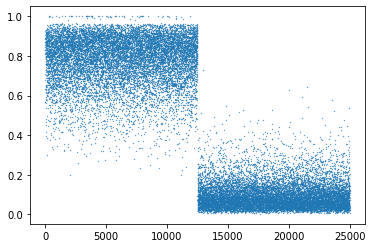

In [54]:
preds = model.predict(x_train)
plt.scatter(np.arange(len(preds)), preds, s=0.1)

In [56]:
print(fpr(bf,x_train,r))

0.03144
